# Generative Advarsarial Network 

Here is presented the first GAN created by Ian Goodfellow https://arxiv.org/abs/1406.2661

Implementation is done in tensorflow

Created by: Tiago Almeida 02/02/2018

In [6]:
##imports
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import utils as ut # auxiliar file to help in data visualization
import tensorflow.keras.backend as K
#tensorflow version when notebook was created - 1.4.0
tf.__version__


'1.9.0'

### Data MNIST

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

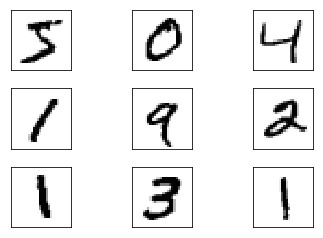

In [7]:
mnist_flat_size = 784

#mnist data

(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#rescale the image to [0-1] range
x_train = x_train/255.
x_test = x_test/255.

print(x_train[1,:,:])

print("Shape of the training images",x_train.shape)

ut.plot_mnist_2dimages(x_train[0:9])

#reset graph using during notebook development
K.clear_session()



### Generator network 
In this implementation i use Functional Keras API for creating the network

The network receive a 100-dimensinal vector (z) and return a 784-vector (same size of mnist image (28x28)). The objective is the generator create a mapping between space of vector z and the real MNIST DATA! (i think :P)

TODO: analyse some problems like "mode colapse"

In [8]:
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

#Dimention of random vector using for sampling
z = 100

#More advancer network
"""
g_input = Input(shape=[z])
H = Dense(256)(g_input)
H = LeakyReLU(alpha=0.2)(H)
H = BatchNormalization(momentum=0.8)(H)
H = Dense(512)(H)
H = LeakyReLU(alpha=0.2)(H)
H = BatchNormalization(momentum=0.8)(H)
H = Dense(1024)(H)
H = LeakyReLU(alpha=0.2)(H)
H = BatchNormalization(momentum=0.8)(H)
H = Dense(mnist_flat_size)(H)
g_output = Activation('sigmoid')(H)
"""

g_input = Input(shape=[z], name="g_input")
H = Dense(128)(g_input)
H = Activation('relu')(H)
#H = Dense(256)(g_input)
#H = Activation('relu')(H)
H = Dense(mnist_flat_size)(H)
g_output = Activation('sigmoid')(H)

generator = Model(g_input,g_output, name="generator")
#No need to compile because he will use train with adversarial method
generator.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               12928     
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               101136    
_________________________________________________________________
activation_1 (Activation)    (None, 784)               0         
Total params: 114,064
Trainable params: 114,064
Non-trainable params: 0
_________________________________________________________________


### Discriminator network 

The network receives a image (784 vector) and try classify as fake or original.

In [9]:

d_optimizer = Adam(lr=1e-4)

d_input = Input(shape=[mnist_flat_size],  name="d_input")
#H = Dense(256)(g_input)
#H = Activation('relu')(H)
H = Dense(128)(d_input)
H = Activation('relu')(H)
H = Dense(1)(H)
d_output = Activation('sigmoid')(H)

discriminator = Model(d_input,d_output, name="discriminator")
discriminator.compile(loss='binary_crossentropy', optimizer=d_optimizer)
discriminator.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_discriminator (InputLa (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_3 (Activation)    (None, 1)                 0         
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


### Adversarial Model

Used to train the generator

In [10]:

def make_trainable(net, val=True):
    net.trainable = val
    for l in net.layers:
        l.trainable = val

# Freeze weights in the discriminator for adversarial training
make_trainable(discriminator, False)

gan_optimizer = Adam(lr=1e-3)

# Build stacked GAN model to train the generator
gan_input = Input(shape=[z], name="gan_z_input")
gan_fake_samples = generator(gan_input)
gan_output = discriminator(gan_fake_samples)

gan = Model(gan_input, gan_output, name="generator_adversarial")
gan.compile(loss='binary_crossentropy', optimizer=gan_optimizer)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
generator (Model)            (None, 784)               114064    
_________________________________________________________________
discriminator (Model)        (None, 1)                 100609    
Total params: 214,673
Trainable params: 114,064
Non-trainable params: 100,609
_________________________________________________________________


### Training Algorithm


Discriminator loss:  0.5767437
Generator loss: 1.0703484


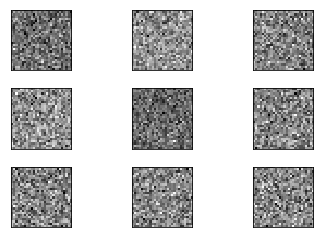

Discriminator loss:  0.033074997
Generator loss: 4.1140976


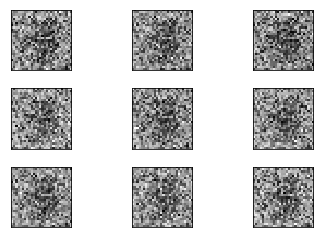

Discriminator loss:  0.017958237
Generator loss: 4.787797


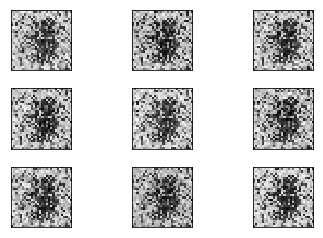

Discriminator loss:  0.01400158
Generator loss: 5.1777277


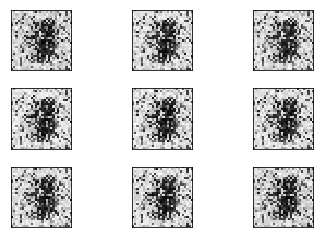

Discriminator loss:  0.015650533
Generator loss: 5.3924637


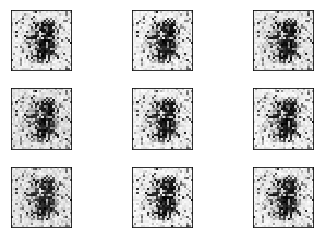

Discriminator loss:  0.0380924
Generator loss: 5.0649576


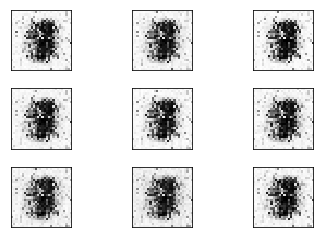

Discriminator loss:  0.07487506
Generator loss: 3.698432


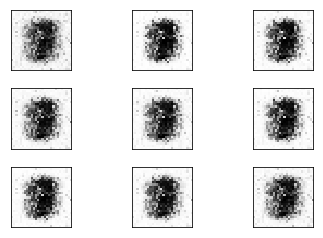

Discriminator loss:  0.14811109
Generator loss: 2.7865586


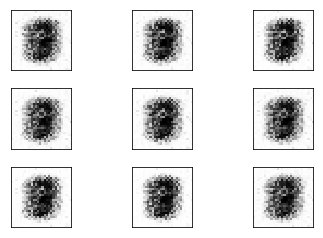

Discriminator loss:  0.1884298
Generator loss: 2.4950254


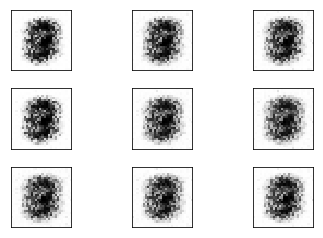

Discriminator loss:  0.12520511
Generator loss: 2.7115726


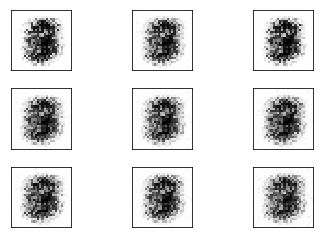

Discriminator loss:  0.10293013
Generator loss: 2.74797


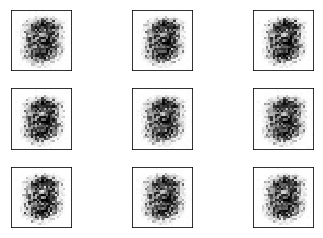

Discriminator loss:  0.08320853
Generator loss: 2.96408


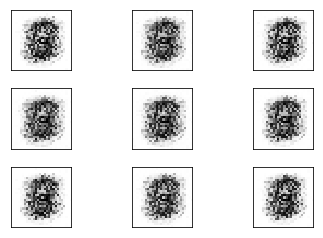

Discriminator loss:  0.05771741
Generator loss: 3.1523864


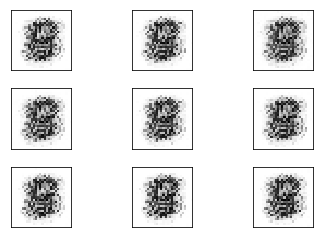

Discriminator loss:  0.059821937
Generator loss: 3.176676


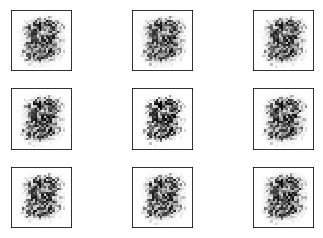

Discriminator loss:  0.051164936
Generator loss: 3.28086


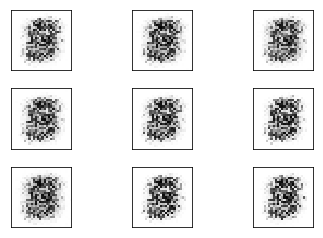

Discriminator loss:  0.052055325
Generator loss: 3.256344


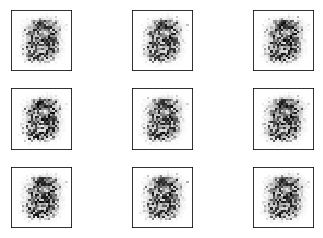

Discriminator loss:  0.055476382
Generator loss: 3.1599977


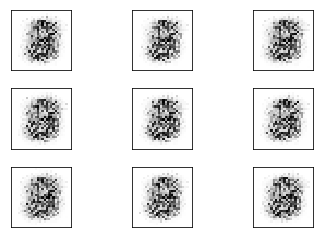

Discriminator loss:  0.055284485
Generator loss: 3.0518942


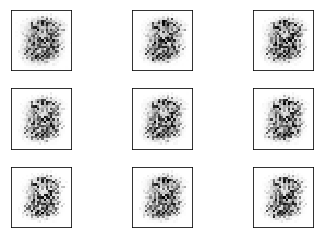

Discriminator loss:  0.06481055
Generator loss: 2.9331052


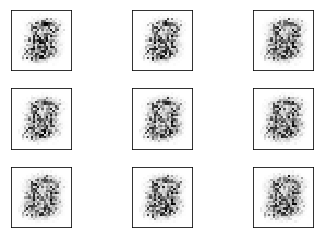

Discriminator loss:  0.08071238
Generator loss: 2.7860887


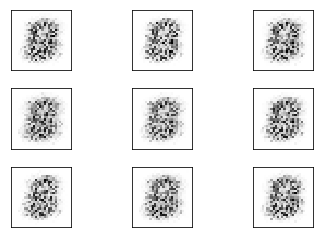

Discriminator loss:  0.10134425
Generator loss: 2.5629785


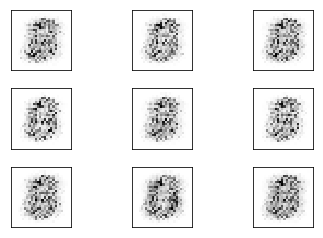

Discriminator loss:  0.11113835
Generator loss: 2.3177776


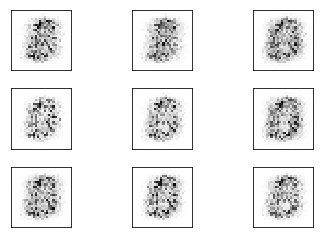

Discriminator loss:  0.11011525
Generator loss: 2.2679956


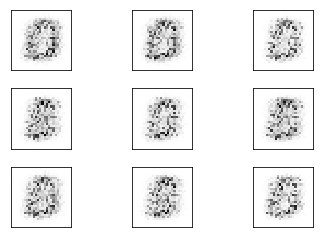

Discriminator loss:  0.14017859
Generator loss: 2.066348


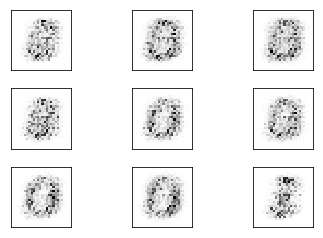

Discriminator loss:  0.16323243
Generator loss: 1.893606


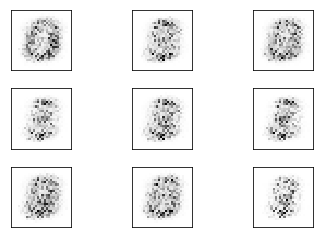

Discriminator loss:  0.1445328
Generator loss: 1.8626108


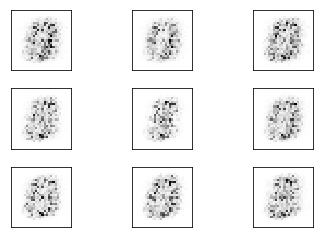

Discriminator loss:  0.17548768
Generator loss: 1.7345146


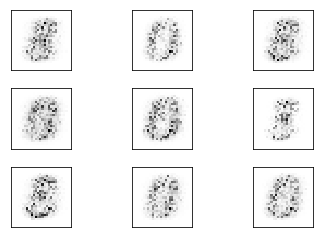

Discriminator loss:  0.15278588
Generator loss: 1.7661542


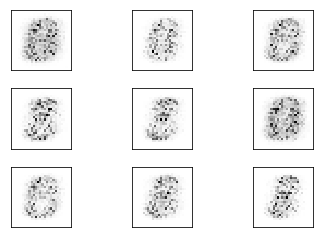

Discriminator loss:  0.17066085
Generator loss: 1.7155211


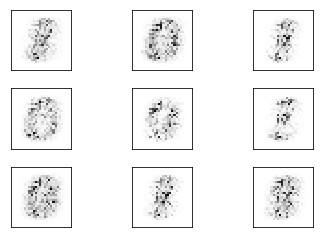

Discriminator loss:  0.13997193
Generator loss: 1.8118901


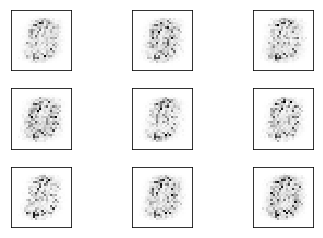

Discriminator loss:  0.14663015
Generator loss: 1.8835894


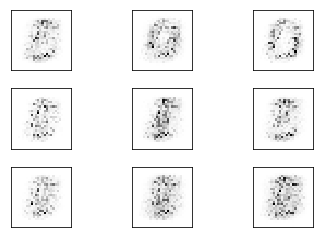

Discriminator loss:  0.14579393
Generator loss: 1.9201982


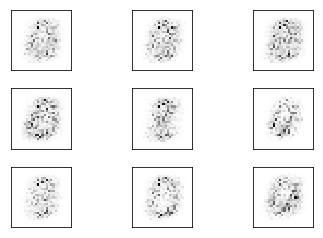

Discriminator loss:  0.1272047
Generator loss: 1.9738686


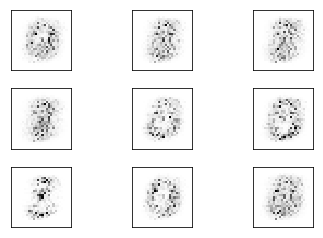

Discriminator loss:  0.11534423
Generator loss: 2.0420642


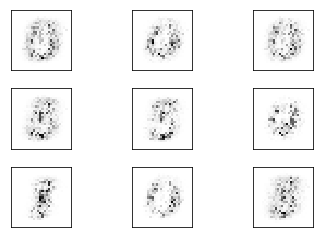

Discriminator loss:  0.11112532
Generator loss: 2.1360013


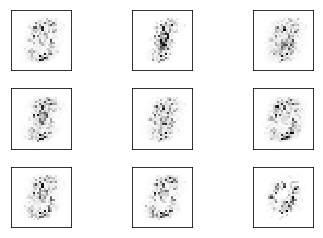

Discriminator loss:  0.10767117
Generator loss: 2.3452306


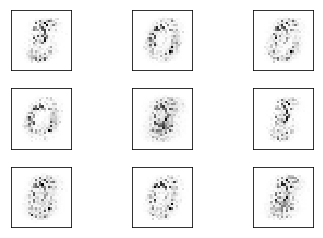

Discriminator loss:  0.08367435
Generator loss: 2.5895586


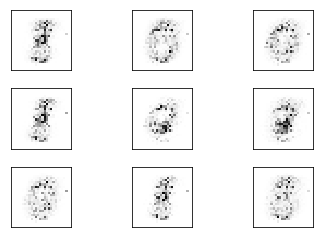

Discriminator loss:  0.09478456
Generator loss: 2.3980956


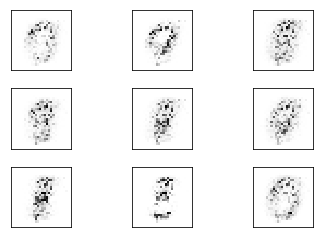

Discriminator loss:  0.083556294
Generator loss: 2.4901507


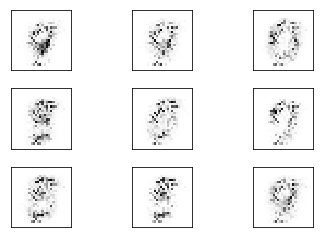

Discriminator loss:  0.078222446
Generator loss: 2.7447202


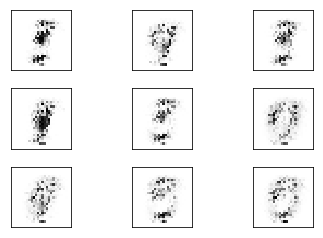

Discriminator loss:  0.06569168
Generator loss: 2.8552363


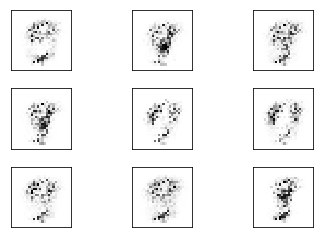

Discriminator loss:  0.080167785
Generator loss: 2.6659513


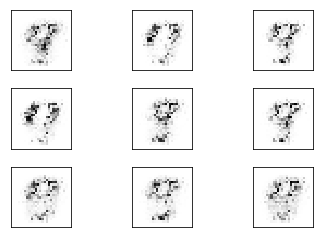

Discriminator loss:  0.06974838
Generator loss: 2.8840883


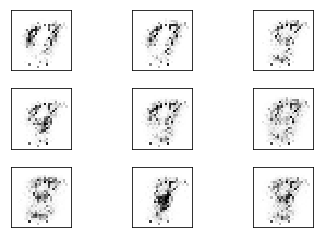

Discriminator loss:  0.060397454
Generator loss: 3.1335812


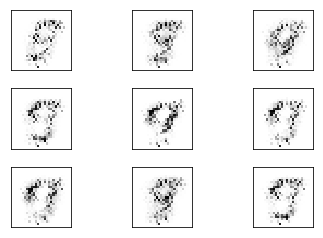

Discriminator loss:  0.06614723
Generator loss: 3.0286052


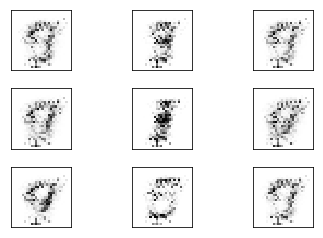

Discriminator loss:  0.073732615
Generator loss: 3.0717807


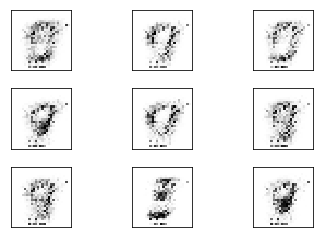

Discriminator loss:  0.07865631
Generator loss: 3.128245


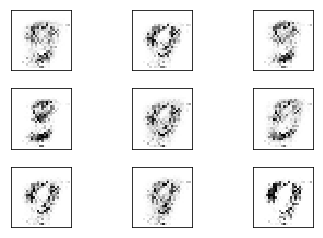

Discriminator loss:  0.082093224
Generator loss: 3.2975738


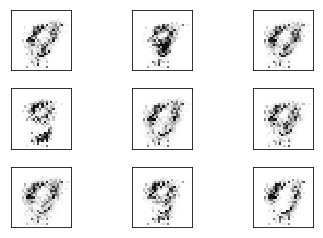

Discriminator loss:  0.10347133
Generator loss: 3.1127748


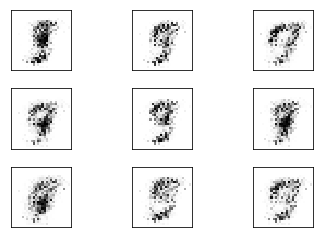

Discriminator loss:  0.10487415
Generator loss: 3.1205418


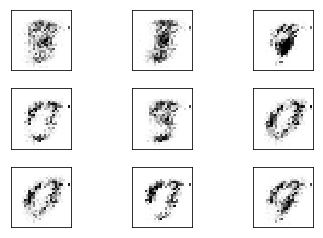

Discriminator loss:  0.12117322
Generator loss: 2.8772438


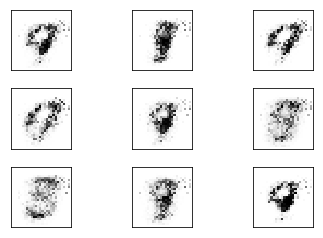

Discriminator loss:  0.14775324
Generator loss: 2.8221366


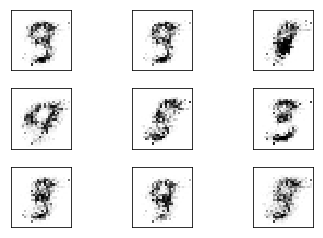

Discriminator loss:  0.08900233
Generator loss: 3.0577826


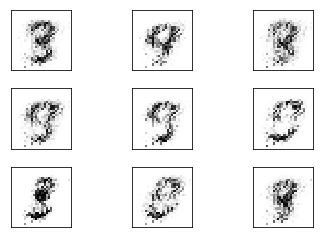

Discriminator loss:  0.108113356
Generator loss: 3.1464384


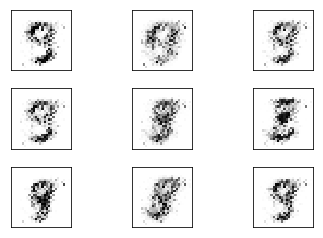

Discriminator loss:  0.12740932
Generator loss: 3.097333


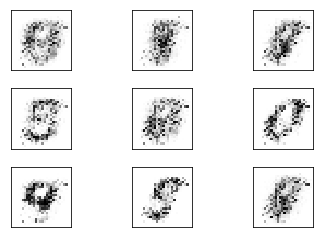

Discriminator loss:  0.11784414
Generator loss: 3.0848968


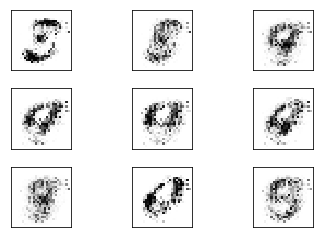

Discriminator loss:  0.15138161
Generator loss: 2.8161237


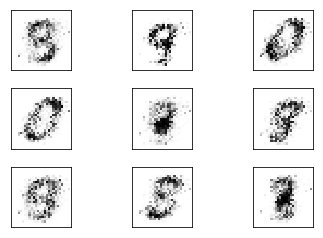

Discriminator loss:  0.148077
Generator loss: 2.9534469


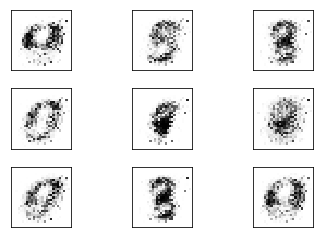

Discriminator loss:  0.14463222
Generator loss: 2.890794


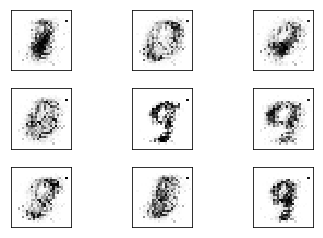

Discriminator loss:  0.13571815
Generator loss: 2.838003


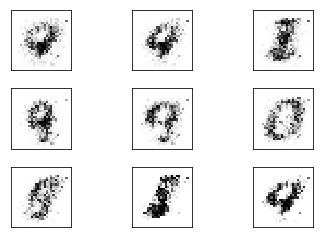

Discriminator loss:  0.1378601
Generator loss: 2.9546545


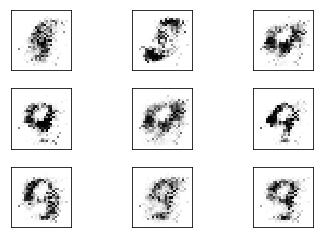

Discriminator loss:  0.17070575
Generator loss: 2.7695382


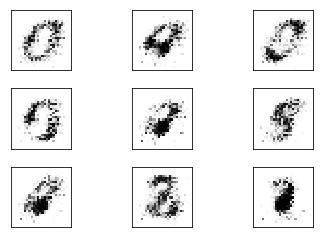

Discriminator loss:  0.18165842
Generator loss: 2.8325553


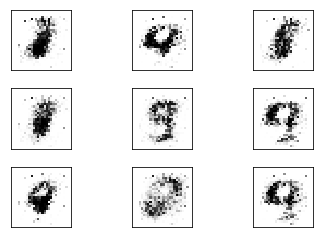

Discriminator loss:  0.14367329
Generator loss: 2.999364


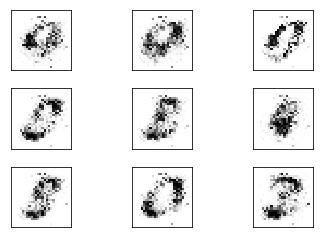

Discriminator loss:  0.14451109
Generator loss: 2.956855


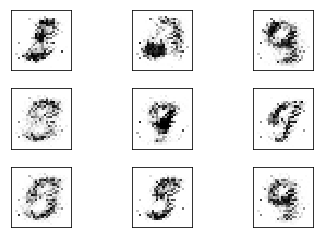

Discriminator loss:  0.12941559
Generator loss: 2.8456137


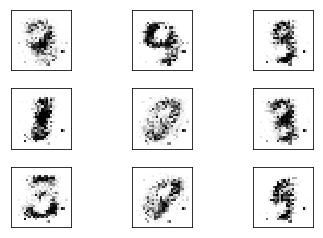

Discriminator loss:  0.1271093
Generator loss: 2.8019004


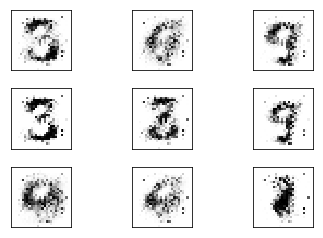

Discriminator loss:  0.11641138
Generator loss: 3.0888886


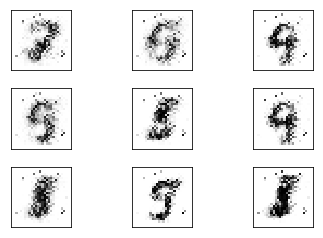

Discriminator loss:  0.11590745
Generator loss: 3.1036851


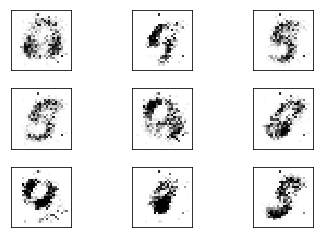

Discriminator loss:  0.09693459
Generator loss: 3.1874394


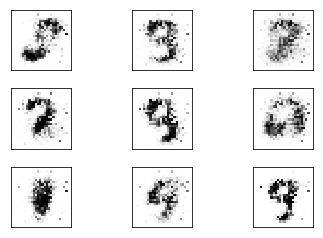

Discriminator loss:  0.116617866
Generator loss: 3.1166227


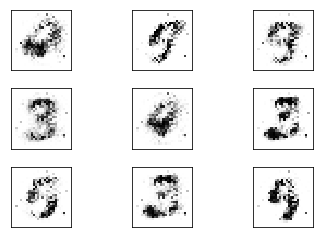

Discriminator loss:  0.14568405
Generator loss: 2.9137847


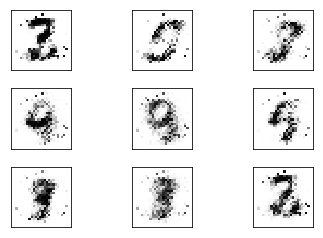

Discriminator loss:  0.15336922
Generator loss: 2.8749218


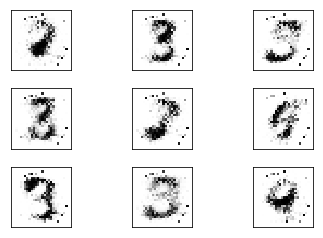

Discriminator loss:  0.10491817
Generator loss: 3.2129047


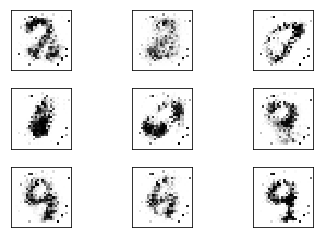

Discriminator loss:  0.06614888
Generator loss: 3.4126358


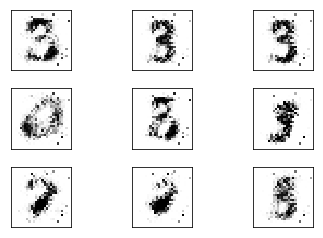

Discriminator loss:  0.09771582
Generator loss: 3.3019


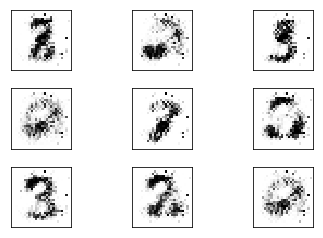

Discriminator loss:  0.098195605
Generator loss: 3.2668397


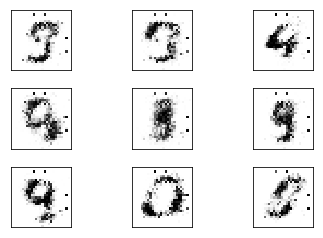

Discriminator loss:  0.07548679
Generator loss: 3.0986226


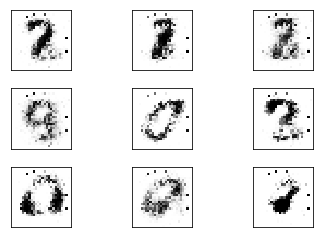

Discriminator loss:  0.06714396
Generator loss: 3.4277546


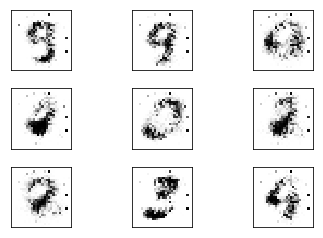

Discriminator loss:  0.07229626
Generator loss: 3.5187438


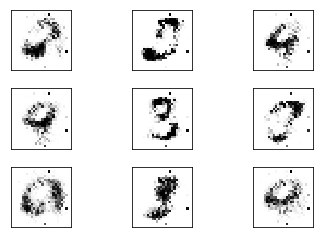

Discriminator loss:  0.08439236
Generator loss: 3.223352


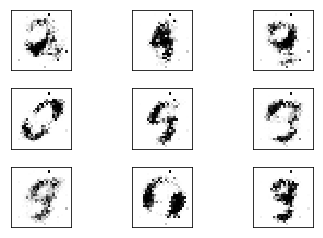

Discriminator loss:  0.08097951
Generator loss: 3.4600816


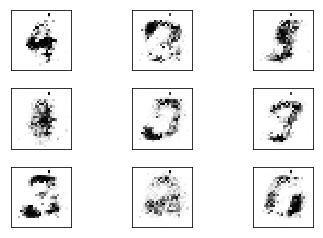

Discriminator loss:  0.09593796
Generator loss: 3.2690794


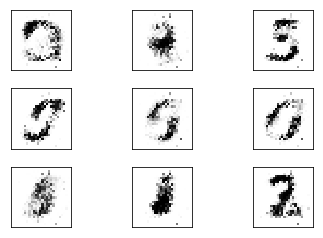

Discriminator loss:  0.0935046
Generator loss: 3.218739


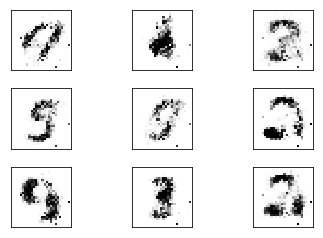

Discriminator loss:  0.082217135
Generator loss: 3.1345909


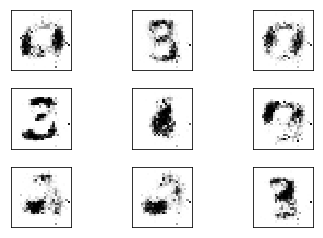

Discriminator loss:  0.11414609
Generator loss: 3.1436217


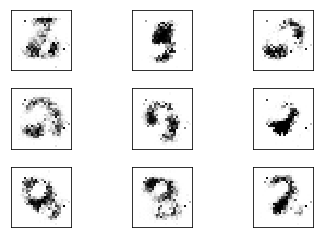

Discriminator loss:  0.10825278
Generator loss: 3.116932


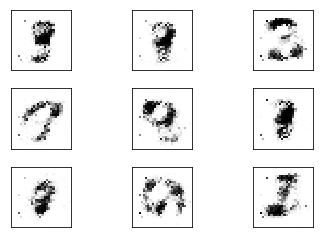

Discriminator loss:  0.112530164
Generator loss: 3.1133368


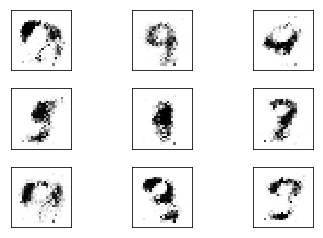

Discriminator loss:  0.1188269
Generator loss: 2.9961684


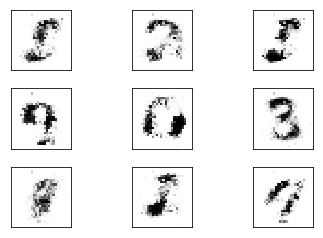

Discriminator loss:  0.108307615
Generator loss: 3.2506588


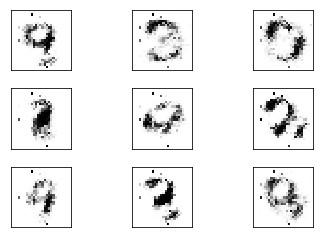

Discriminator loss:  0.09402074
Generator loss: 3.2745452


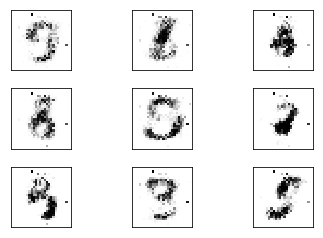

Discriminator loss:  0.12106296
Generator loss: 3.0765398


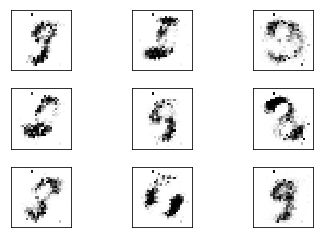

Discriminator loss:  0.116627455
Generator loss: 3.1275494


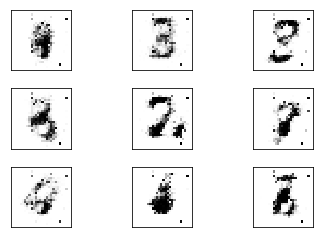

Discriminator loss:  0.11517177
Generator loss: 3.0612988


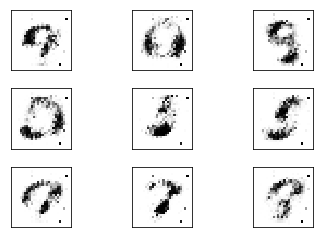

Discriminator loss:  0.10292427
Generator loss: 3.250494


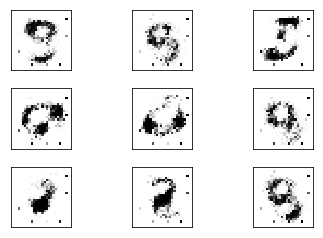

Discriminator loss:  0.09346777
Generator loss: 3.5114443


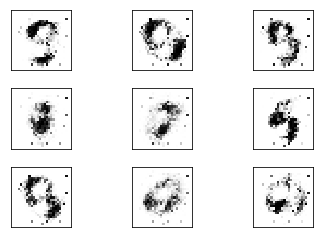

Discriminator loss:  0.103506304
Generator loss: 3.377233


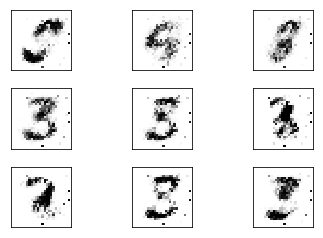

Discriminator loss:  0.15281357
Generator loss: 3.003683


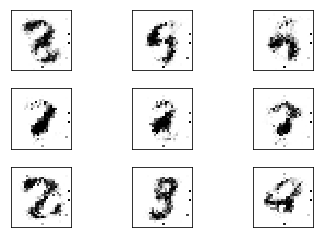

Discriminator loss:  0.10694623
Generator loss: 3.201661


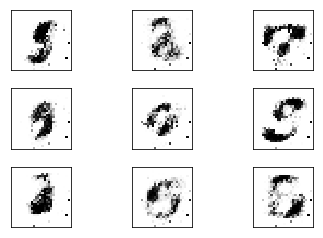

Discriminator loss:  0.11737455
Generator loss: 3.2174206


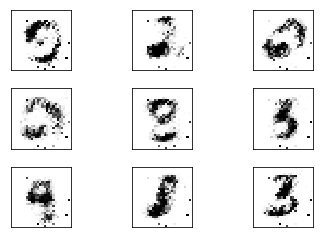

Discriminator loss:  0.13624628
Generator loss: 3.266122


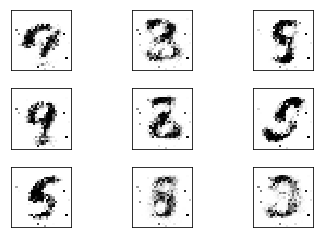

In [172]:

def random_Z(m, n=z):
    '''
    Random values for Z between -1 and 1
    
    :param m: number of samples
    :param n: dimension of Z
    :return: Vector with shape (m,n)
    '''
    return np.random.uniform(-1., 1., size=[m, n])

## Start graph computations and algorithm


batch_size = 1000 #must be multiple of 2
epoach = 10000

##check summary again
#make_trainable(discriminator,True)
#discriminator.summary()
#make_trainable(discriminator,False)
#gan.summary()

for i in range(epoach):
    
    #generate images
    synthetic_images = generator.predict(random_Z(batch_size//2))
    #select from tranning set
    real_images = x_train[np.random.randint(0,x_train.shape[0],size=batch_size//2),:,:].reshape([-1,mnist_flat_size]) 
    
    d_x = np.concatenate((synthetic_images, real_images))
    d_y = np.zeros([batch_size,1])
    
    d_y[batch_size//2:] = 1 #second half of the batch are true images so have label 1 and fake (first half) have label 0
        
    #print("d_x shape",d_x.shape)
    #print("d_y shape",d_y.shape)    
    
    #print(d_y)    
    #first discriminator
    make_trainable(discriminator,True)
    d_loss = discriminator.train_on_batch(d_x,d_y)
    
    #second generator in adversarail faction
    gan_x = random_Z(batch_size)
    gan_y = np.ones([batch_size,1])
    #print("gan_x shape",gan_x.shape) 
    #print("gan_y shape",gan_y.shape)
    #print(gan_y)
    make_trainable(discriminator,False)
    gan_loss = gan.train_on_batch(gan_x,gan_y)
    
    
    print("Epoach",i,end='\r')
    
    if i%100 == 0:
       
        print("Discriminator loss: ",d_loss)
        print("Generator loss:",gan_loss)

  
        #sample 9 images from generator
        generated_images = generator.predict(random_Z(9))
        ut.plot_mnist_images(generated_images)
    
print("Discriminator loss: ",d_loss)
print("Generator loss:",gan_loss)


#sample 9 images from generator
generated_images = generator.predict(random_Z(9))
ut.plot_mnist_images(generated_images)


### Analysing noise Z

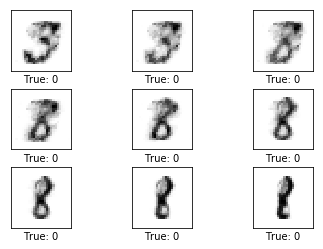